In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

import warnings
warnings.filterwarnings('ignore')

### Load Train Set

In [2]:
x_train = joblib.load("data/processed/x_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")

In [3]:
x_train

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
60493,1.000000,41,0,0.075603,6057.0,2,0,1.0,0,0
21757,0.860167,46,1,0.537121,5050.0,9,1,0.0,0,2
89129,0.272232,31,0,0.398012,2916.0,10,2,0.0,0,0
49283,0.940739,44,0,0.509322,12604.0,17,2,2.0,0,0
67587,0.000000,48,0,0.499417,6000.0,13,1,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...
130869,0.013155,36,0,0.192900,11041.0,11,2,2.0,0,0
49478,1.201384,46,3,0.046359,7333.0,5,0,2.0,2,0
18288,0.025948,28,0,0.201798,1000.0,2,0,0.0,0,0
16780,0.044615,56,0,0.312045,15250.0,10,2,0.0,0,0


In [4]:
y_train

60493     0
21757     1
89129     0
49283     0
67587     0
         ..
130869    0
49478     0
18288     0
16780     0
121492    0
Name: SeriousDlqin2yrs, Length: 72161, dtype: int64

In [5]:
dataset = pd.concat([x_train, y_train], axis = 1)

In [6]:
dataset.head()

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,SeriousDlqin2yrs
60493,1.000000,41,0,0.075603,6057.0,2,0,1.0,0,0,0
21757,0.860167,46,1,0.537121,5050.0,9,1,0.0,0,2,1
89129,0.272232,31,0,0.398012,2916.0,10,2,0.0,0,0,0
49283,0.940739,44,0,0.509322,12604.0,17,2,2.0,0,0,0
67587,0.000000,48,0,0.499417,6000.0,13,1,2.0,0,0,0


### Exploratory Data Analysis

#### Cek Missing Value

In [7]:
# cek null value
dataset.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
Age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberRealEstateLoansOrLines            0
NumberOfDependents                      0
NumberOfTimes90DaysLate                 0
NumberOfTime60-89DaysPastDueNotWorse    0
SeriousDlqin2yrs                        0
dtype: int64

In [8]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,'percent_missing': percent_missing})
missing_value_df = missing_value_df.reset_index()
missing_value_df = missing_value_df[['column_name','percent_missing']]
missing_value_df

,column_name,percent_missing
0,RevolvingUtilizationOfUnsecuredLines,0.0
1,Age,0.0
2,NumberOfTime30-59DaysPastDueNotWorse,0.0
3,DebtRatio,0.0
4,MonthlyIncome,0.0
5,NumberOfOpenCreditLinesAndLoans,0.0
6,NumberRealEstateLoansOrLines,0.0
7,NumberOfDependents,0.0
8,NumberOfTimes90DaysLate,0.0
9,NumberOfTime60-89DaysPastDueNotWorse,0.0


#### Impute NumberOfDependents with Median, MonthlyIncome not yet known

In [9]:
data_income = dataset[['MonthlyIncome']]

# Assing differently imputed values to different columns
data_income['income_0'] = dataset['MonthlyIncome'].fillna(0)
data_income['income_Neg1'] = dataset['MonthlyIncome'].fillna(-1)
data_income['income_99'] = dataset['MonthlyIncome'].fillna(99)

In [10]:
data_income.describe().T[['mean', 'std', 'min', '50%', 'max']]

,mean,std,min,50%,max
MonthlyIncome,6644.158451,10182.552184,0.0,5400.0,1072500.0
income_0,6644.158451,10182.552184,0.0,5400.0,1072500.0
income_Neg1,6644.158451,10182.552184,0.0,5400.0,1072500.0
income_99,6644.158451,10182.552184,0.0,5400.0,1072500.0


In [11]:
# Visualize the distirbution

#data_income.plot(kind='kde', figsize=(12, 7), title='Arbitrary Value Imputation Results');

### Informasi Statistik

#### Skewness

In [11]:
# cek skewness
dataset.skew(numeric_only = True)

RevolvingUtilizationOfUnsecuredLines    62.700897
Age                                      0.226283
NumberOfTime30-59DaysPastDueNotWorse    27.842872
DebtRatio                               75.807573
MonthlyIncome                           47.491123
NumberOfOpenCreditLinesAndLoans          1.222321
NumberRealEstateLoansOrLines             3.916372
NumberOfDependents                       1.460848
NumberOfTimes90DaysLate                 28.861513
NumberOfTime60-89DaysPastDueNotWorse    29.352439
SeriousDlqin2yrs                         3.386303
dtype: float64

In [12]:
dataset.describe()

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,SeriousDlqin2yrs
count,72161.000000,72161.000000,72161.000000,72161.000000,7.216100e+04,72161.000000,72161.000000,72161.000000,72161.000000,72161.000000,72161.000000
mean,5.833723,51.266737,0.368523,27.527038,6.644158e+03,8.767631,1.057593,0.856488,0.201258,0.176092,0.069484
std,211.022556,14.395459,3.347470,488.188300,1.018255e+04,5.176105,1.156974,1.155039,3.312992,3.294442,0.254276
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.035749,40.000000,0.000000,0.144463,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.179137,51.000000,0.000000,0.296976,5.400000e+03,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.581655,61.000000,0.000000,0.483719,8.214000e+03,11.000000,2.000000,2.000000,0.000000,0.000000,0.000000
max,22000.000000,102.000000,98.000000,61106.500000,1.072500e+06,58.000000,54.000000,20.000000,98.000000,98.000000,1.000000


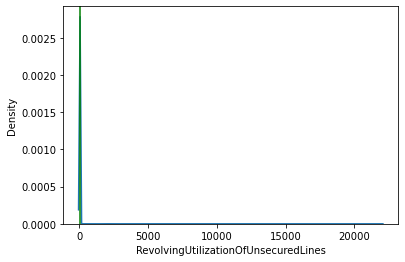

In [13]:
# plot untuk melihat distribusi RevolvingUtilizationOfUnsecuredLines jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "RevolvingUtilizationOfUnsecuredLines")
plt.axvline(dataset.RevolvingUtilizationOfUnsecuredLines.mean(), 0, 1, color = "g")

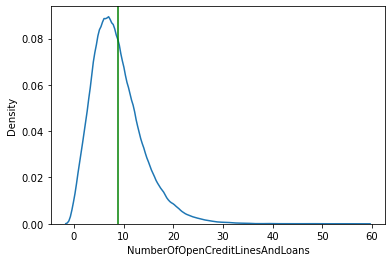

In [14]:
# plot untuk melihat distribusi NumberOfOpenCreditLinesAndLoans jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "NumberOfOpenCreditLinesAndLoans")
plt.axvline(dataset.NumberOfOpenCreditLinesAndLoans.mean(), 0, 1, color = "g")

In [16]:
dataset.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs'],
      dtype='object')

In [17]:
feature_predictor = ['RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

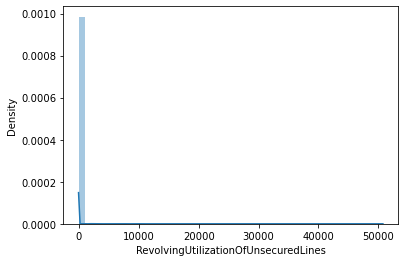

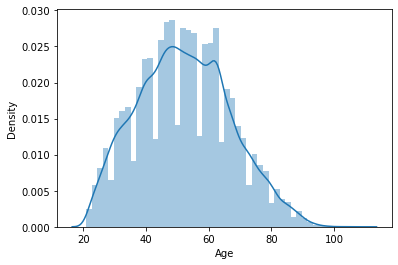

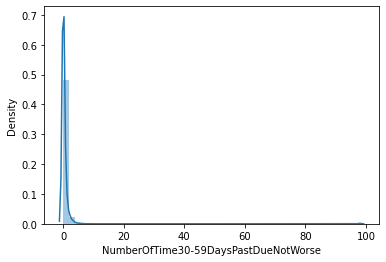

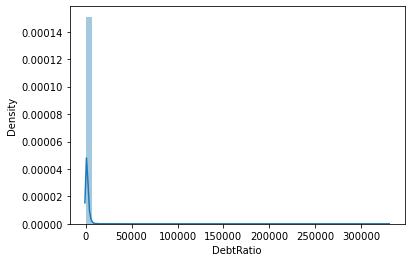

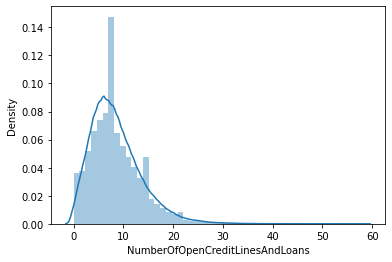

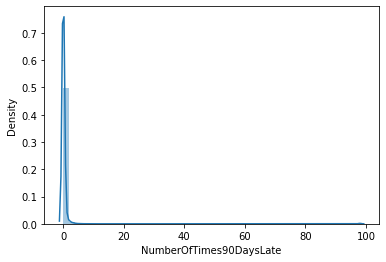

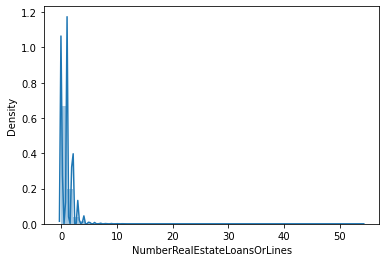

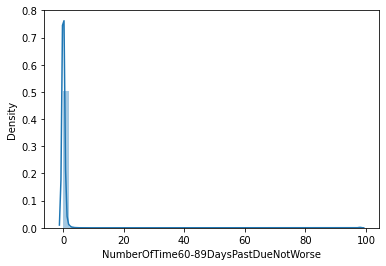

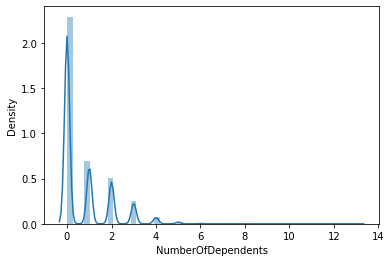

In [18]:
for i in feature_predictor:
    sns.distplot(dataset[i])
    plt.show()

#### Hampir semua variabel memiliki skewness yang sangat tinggi
- RevolvingUtilizationOfUnsecuredLines
- NumberOfTime30-59DaysPastDueNotWorse
- DebtRatio
- NumberOfTimes90DaysLate
- NumberRealEstateLoansOrLines
- NumberOfTime60-89DaysPastDueNotWorse

#### Kita akan coba log transformation variabel di atas agar distribusinya less skewed

In [19]:
dataset_log = dataset[feature_predictor]
for i in feature_predictor:
    dataset_log[i] = np.log(dataset_log[i])

In [20]:
# cek skewness
dataset_log.skew(numeric_only = True)

RevolvingUtilizationOfUnsecuredLines         NaN
Age                                    -0.453835
NumberOfTime30-59DaysPastDueNotWorse         NaN
DebtRatio                                    NaN
NumberOfOpenCreditLinesAndLoans              NaN
NumberOfTimes90DaysLate                      NaN
NumberRealEstateLoansOrLines                 NaN
NumberOfTime60-89DaysPastDueNotWorse         NaN
NumberOfDependents                           NaN
dtype: float64

#### Skewness banyak yang NaN Karena dataset kita mengandung banyak angka 0, kita perlu ubah log transformationnya dulu

In [21]:
dataset_log_1 =  dataset[feature_predictor]
for i in feature_predictor:
    dataset_log_1[i] = np.log(1+dataset_log_1[i].values)

In [22]:
# cek skewness
dataset_log_1.skew(numeric_only = True)

RevolvingUtilizationOfUnsecuredLines    11.873924
Age                                     -0.439174
NumberOfTime30-59DaysPastDueNotWorse     4.260801
DebtRatio                                1.750590
NumberOfOpenCreditLinesAndLoans         -0.733310
NumberOfTimes90DaysLate                  8.782988
NumberRealEstateLoansOrLines             0.232274
NumberOfTime60-89DaysPastDueNotWorse    10.671243
NumberOfDependents                       0.837621
dtype: float64

#### Setelah log transform, data kita jadi lebih less skewed

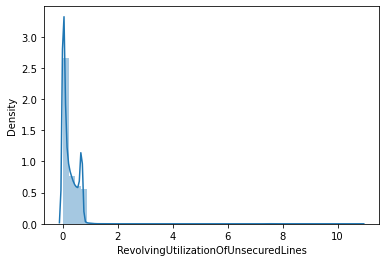

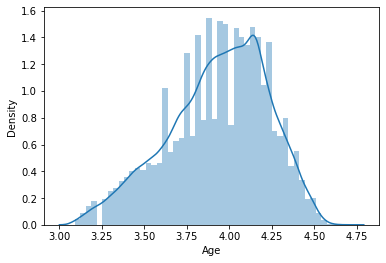

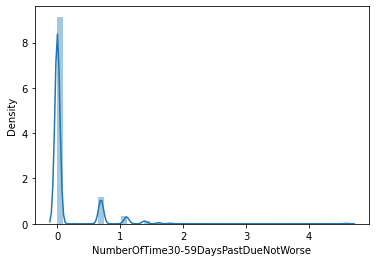

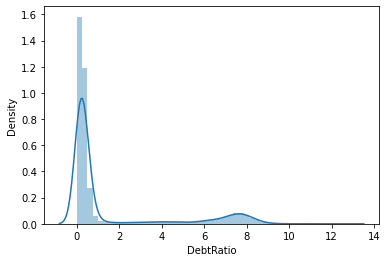

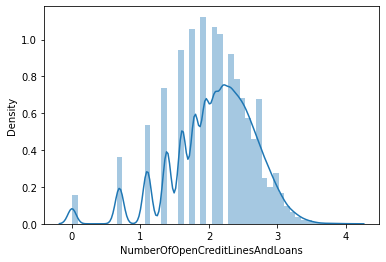

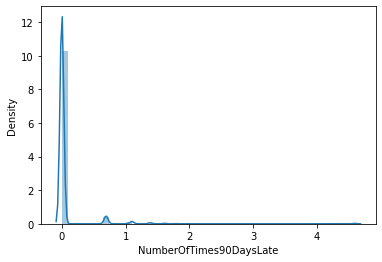

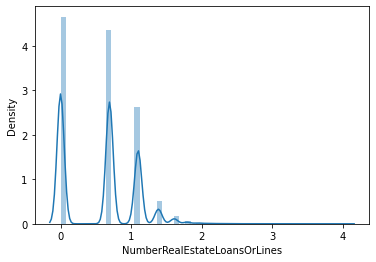

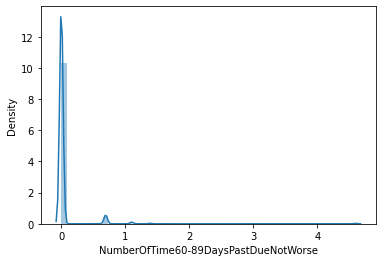

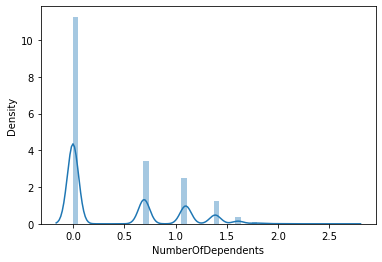

In [23]:
for i in feature_predictor:
    sns.distplot(dataset_log_1[i])
    plt.show()

## Data Viz

<a id="6"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualization</p>

In [24]:
dataset.head()

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
15901,1.000000,67,0,0.085046,3162.0,2,0,0,0,0.0,0
149886,0.463773,51,0,0.371795,7565.0,7,0,2,0,0.0,0
54863,0.034308,55,0,1290.000000,NaN,9,0,2,0,0.0,0
24206,0.424373,45,0,0.228204,11366.0,6,0,1,0,1.0,0
134543,0.477800,48,0,0.729924,9600.0,11,0,7,0,1.0,0


In [16]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#FDECCB","figure.facecolor":"#FDECCB","grid.color":"white"})
sns.set_context("poster",font_scale = .7)

# palette = ["#432C0A","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette = ["#764a23","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette_cmap = ["#6c9a76","#cc4b57","#764a23","#f25a29","#f7941d"]

### Creditor Age

Let's have a look on the distribution of creditor's age :


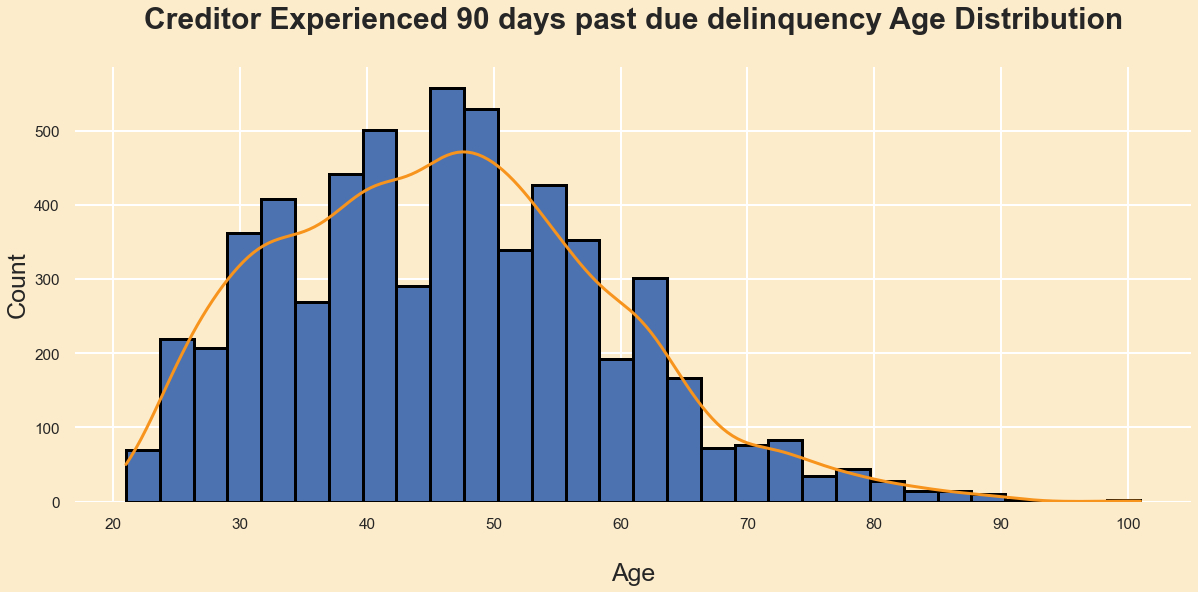

In [26]:
print(f"Let's have a look on the distribution of creditor's age :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=dataset[dataset["SeriousDlqin2yrs"] == 1],x="Age",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
#p.axes.lines[1].set_color(palette[0])
p.axes.set_title("Creditor Experienced 90 days past due delinquency Age Distribution\n",fontsize=30,fontweight = 'bold')
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nAge",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

## Monthly Income

In [27]:
dataset['DebtRatio'].describe()

count     90000.000000
mean        360.089320
std        2336.753909
min           0.000000
25%           0.176323
50%           0.367813
75%           0.867378
max      329664.000000
Name: DebtRatio, dtype: float64

In [28]:
dataset['DebtRatio']

15901        0.085046
149886       0.371795
54863     1290.000000
24206        0.228204
134543       0.729924
             ...     
90431        0.611374
18048        0.472323
3895         0.322344
74354        0.389974
80530      866.000000
Name: DebtRatio, Length: 90000, dtype: float64

In [29]:
dataset_log_1.head()

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
15901,0.693147,4.219508,0.0,0.081622,1.098612,0.0,0.000000,0.0,0.000000
149886,0.381017,3.951244,0.0,0.316120,2.079442,0.0,1.098612,0.0,0.000000
54863,0.033733,4.025352,0.0,7.163172,2.302585,0.0,1.098612,0.0,0.000000
24206,0.353732,3.828641,0.0,0.205553,1.945910,0.0,0.693147,0.0,0.693147
134543,0.390555,3.891820,0.0,0.548077,2.484907,0.0,2.079442,0.0,0.693147


In [30]:
dataset['DebtRatio'].mean()

360.08932049737524

In [31]:
dataset_log_1_full = pd.concat([dataset_log_1, y_train], axis = 1)

Let's have a look on the distribution of creditor's Monthly Income :


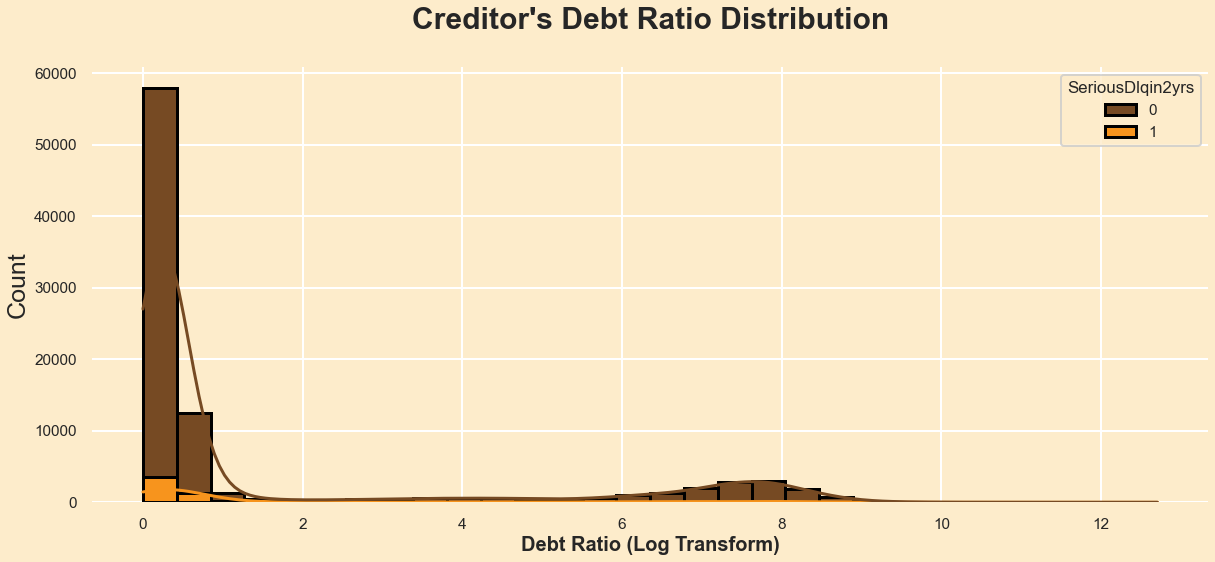

In [32]:
print(f"Let's have a look on the distribution of creditor's Monthly Income :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=dataset_log_1_full,x="DebtRatio",hue= "SeriousDlqin2yrs",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
#p.axes.lines[1].set_color(palette[0])
p.axes.set_title("Creditor's Debt Ratio Distribution\n",fontsize=30,fontweight = 'bold')
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("Debt Ratio (Log Transform)",fontsize=20,fontweight = 'bold')
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

## Dependents

Let's have a look on the distribution of creditor's Number of Dependents :


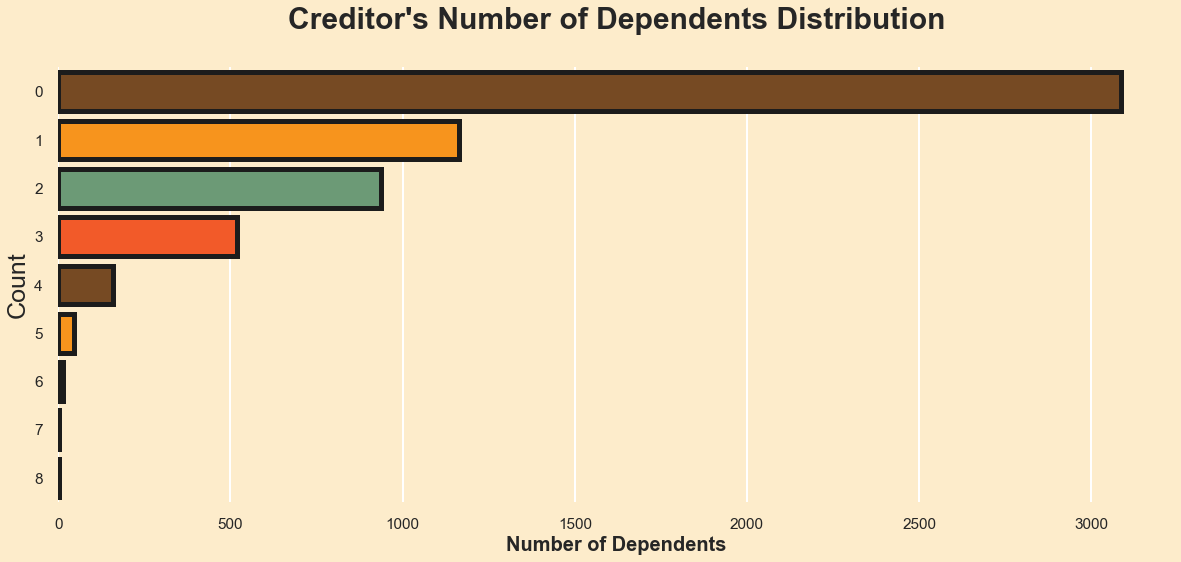

In [33]:
print(f"Let's have a look on the distribution of creditor's Number of Dependents :")
plt.subplots(figsize=(20, 8))
#p = sns.histplot(data=dataset[dataset['NumberOfDependents'] <=10],x="NumberOfDependents",hue= "SeriousDlqin2yrs",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p=sns.countplot(y=dataset[(dataset['NumberOfDependents'] <=10) & (dataset['SeriousDlqin2yrs'] == 1)]['NumberOfDependents'],order=dataset[(dataset['NumberOfDependents'] <=10) & (dataset['SeriousDlqin2yrs'] == 1)]['NumberOfDependents'].value_counts(ascending=False).index,palette=palette[0:4], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
#p.axes.lines[0].set_color(palette[1])
#p.axes.lines[1].set_color(palette[0])
p.axes.set_title("Creditor's Number of Dependents Distribution\n",fontsize=30,fontweight = 'bold')
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("Number of Dependents",fontsize=20,fontweight = 'bold')
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

In [29]:
dataset[(dataset['NumberOfDependents'] <=10) & (dataset['SeriousDlqin2yrs'] == 1)]['NumberOfDependents']

21757     0.0
1614      0.0
57025     0.0
109180    0.0
136188    2.0
         ... 
87753     3.0
119761    0.0
85061     2.0
115962    1.0
27363     2.0
Name: NumberOfDependents, Length: 5014, dtype: float64

### Serious Dlq

In [30]:
dataset['SeriousDlqin2yrs']

60493     0
21757     1
89129     0
49283     0
67587     0
         ..
130869    0
49478     0
18288     0
16780     0
121492    0
Name: SeriousDlqin2yrs, Length: 72161, dtype: int64

In [23]:
dataset['SeriousDlqin2yrs'].value_counts(ascending=False).

0    67147
1     5014
Name: SeriousDlqin2yrs, dtype: int64

In [32]:
67147/(67147+5014)

0.9305164839733374

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

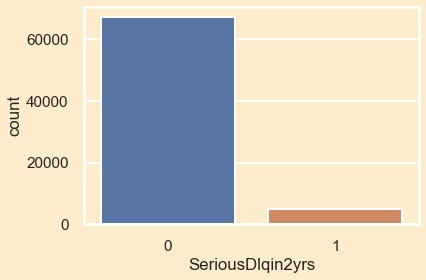

In [31]:
sns.countplot(x=dataset['SeriousDlqin2yrs'])

Let's have a look on the distribution of creditor's Number of Dependents :


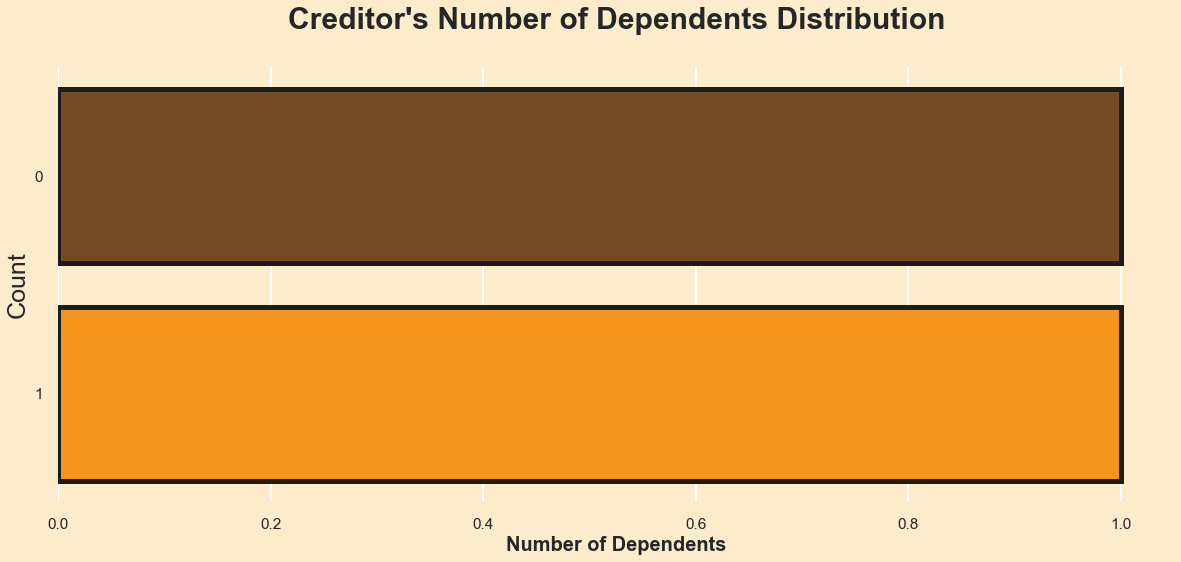

In [28]:
print(f"Let's have a look on the distribution of creditor's Number of Dependents :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=dataset['SeriousDlqin2yrs'].value_counts(ascending=False).index,palette=palette[0:4], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
#p.axes.lines[0].set_color(palette[1])
#p.axes.lines[1].set_color(palette[0])
p.axes.set_title("Creditor's Number of Dependents Distribution\n",fontsize=30,fontweight = 'bold')
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("Number of Dependents",fontsize=20,fontweight = 'bold')
sns.despine(left=True, bottom=True)

plt.show()

## Number of Open Credit Lines and Loans

Let's have a look on the distribution of creditor's Open Credit and Loan:


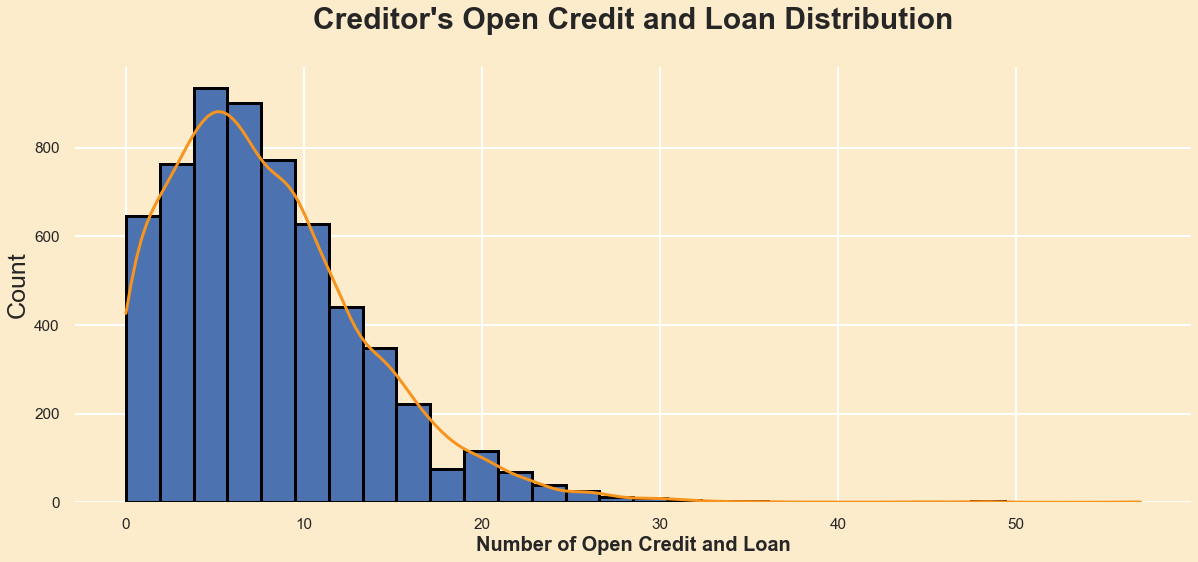

In [34]:
print(f"Let's have a look on the distribution of creditor's Open Credit and Loan:")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=dataset[dataset['SeriousDlqin2yrs']== 1],x="NumberOfOpenCreditLinesAndLoans",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
#p.axes.lines[1].set_color(palette[0])
p.axes.set_title("Creditor's Open Credit and Loan Distribution\n",fontsize=30,fontweight = 'bold')
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("Number of Open Credit and Loan",fontsize=20,fontweight = 'bold')
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the distribution of creditor's  Open Credit and Loan :


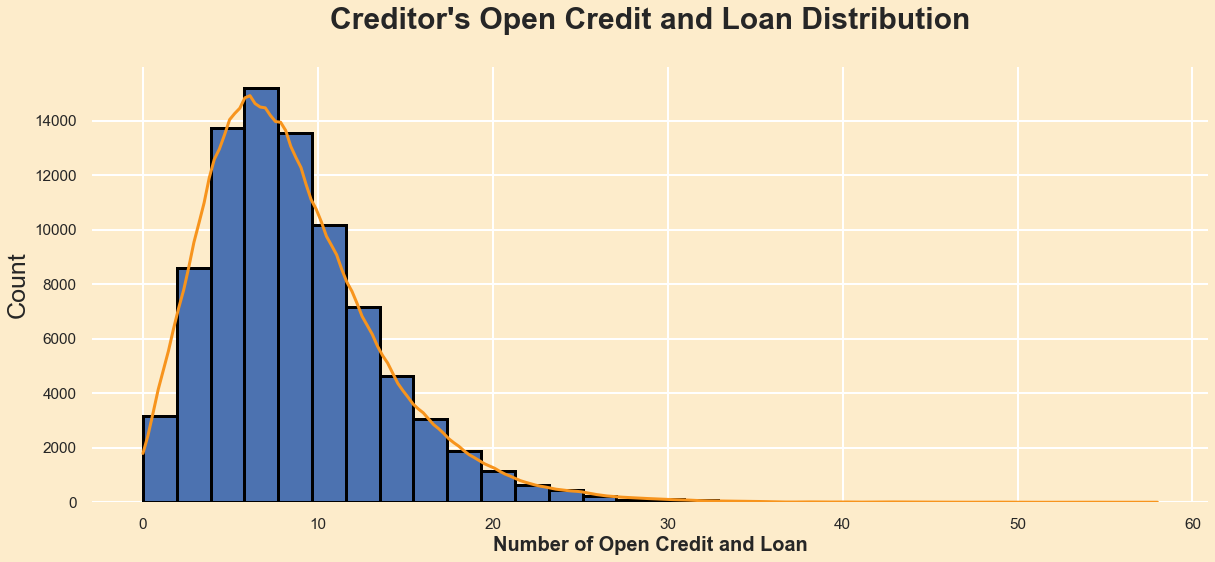

In [35]:
print(f"Let's have a look on the distribution of creditor's  Open Credit and Loan :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=dataset[dataset['SeriousDlqin2yrs']== 0],x="NumberOfOpenCreditLinesAndLoans",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
#p.axes.lines[1].set_color(palette[0])
p.axes.set_title("Creditor's Open Credit and Loan Distribution\n",fontsize=30,fontweight = 'bold')
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("Number of Open Credit and Loan",fontsize=20,fontweight = 'bold')
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

## Correlation

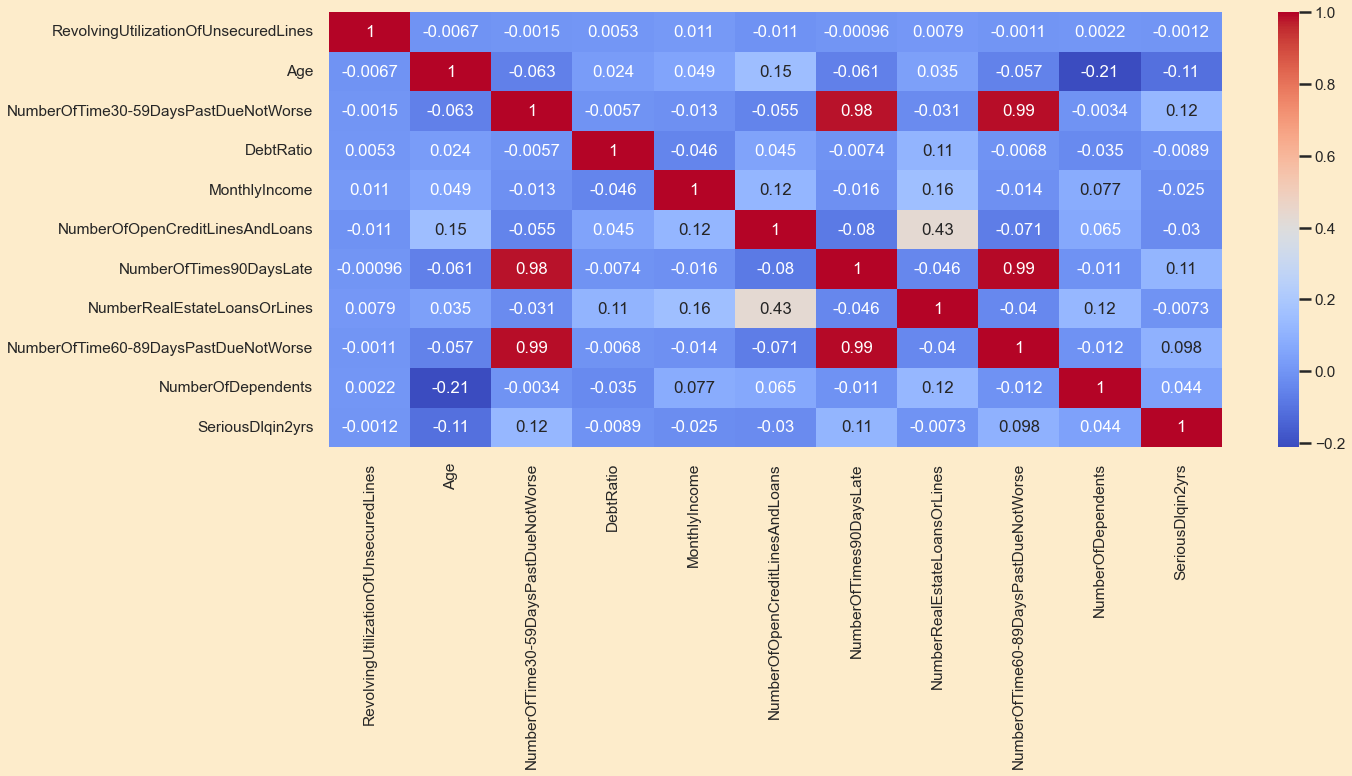

In [36]:
corr_matrix = dataset.corr()

plt.subplots(figsize=(20, 8))
# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Alternatively, you can plot a pairwise scatterplot matrix using the pairplot function
#sns.pairplot(dataset)

# Display the plots
plt.show()

In [37]:
dataset.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs'],
      dtype='object')

In [38]:
dataset[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']]

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
15901,0,0,0
149886,0,0,0
54863,0,0,0
24206,0,0,0
134543,0,0,0
...,...,...,...
90431,0,0,0
18048,0,0,0
3895,0,0,0
74354,0,1,0


In [39]:
dataset[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']].describe()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
count,90000.000000,90000.000000,90000.000000
mean,0.419767,0.264489,0.238189
std,4.176213,4.151722,4.137866
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,98.000000,98.000000,98.000000


In [40]:
dataset[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']].sum()

NumberOfTime30-59DaysPastDueNotWorse    37779
NumberOfTimes90DaysLate                 23804
NumberOfTime60-89DaysPastDueNotWorse    21437
dtype: int64